In this notebook we look at which health questions have the highest correlation to poor mental health prevalence. We also use Tableau to create a map of the census tracts for each city.

In [1]:
from sodapy import Socrata
import pandas as pd

client = Socrata("chronicdata.cdc.gov", None)
results = client.get("k86t-wghb", limit=30000) # Source: https://dev.socrata.com/foundry/chronicdata.cdc.gov/k86t-wghb
results_df = pd.DataFrame.from_records(results)
results_df.head()

,access2_crude95ci,access2_crudeprev,arthritis_crude95ci,arthritis_crudeprev,binge_crude95ci,binge_crudeprev,bphigh_crude95ci,bphigh_crudeprev,bpmed_crude95ci,bpmed_crudeprev,...,placename,population2010,sleep_crude95ci,sleep_crudeprev,stateabbr,stroke_crude95ci,stroke_crudeprev,teethlost_crude95ci,teethlost_crudeprev,tractfips
0,"( 7.2, 9.9)",8.5,"(20.5, 22.2)",21.3,"(23.1, 24.2)",23.7,"(25.9, 27.6)",26.7,"(73.8, 75.6)",74.7,...,Philadelphia,1819,"(36.9, 39.4)",38.1,PA,"( 2.3, 2.8)",2.5,"( 8.2, 15.7)",11.7,42101020600
1,"(13.3, 17.2)",15.3,"(15.7, 16.8)",16.2,"(17.1, 18.2)",17.7,"(26.3, 27.7)",27,"(65.0, 66.8)",65.9,...,Stockton,12552,"(37.9, 39.8)",38.8,CA,"( 2.2, 2.5)",2.3,"(10.7, 16.2)",13.2,06077003801
2,"( 5.3, 8.4)",6.6,"(20.5, 22.9)",21.6,"(18.9, 20.4)",19.7,"(29.8, 32.5)",31.1,"(80.2, 82.2)",81.2,...,Baton Rouge,4673,"(26.5, 29.4)",27.9,LA,"( 2.0, 2.6)",2.2,"( 3.6, 10.3)",6.2,22033004900
3,"( 8.8, 12.7)",10.7,"(23.7, 26.4)",25.1,"(18.2, 19.4)",18.8,"(26.2, 28.7)",27.4,"(72.0, 74.3)",73.2,...,New York,4693,"(41.5, 44.6)",43.1,NY,"( 2.3, 3.0)",2.6,"( 8.5, 19.2)",13.4,36085007400
4,"( 6.7, 9.3)",7.9,"(15.3, 16.7)",16,"(18.7, 19.5)",19.1,"(24.7, 26.4)",25.6,"(70.5, 72.3)",71.5,...,San Francisco,5300,"(30.8, 33.0)",31.9,CA,"( 1.9, 2.3)",2.1,"( 5.4, 10.2)",7.6,06075035201


In [2]:
# Manually remove unwanted columns and rename the question columns
results_df = pd.DataFrame({
    'City': results_df['placename'],
    'State': results_df['stateabbr'],
    'Population': results_df['population2010'],
    'Geolocation': results_df['geolocation'],
    'Annual Checkup': results_df['checkup_crudeprev'],
    'Arthritis': results_df['arthritis_crudeprev'],
    'Binge Drinking': results_df['binge_crudeprev'],
    'Cancer (except skin)': results_df['cancer_crudeprev'],
    'Cholesterol Screening': results_df['cholscreen_crudeprev'],
    'Chronic Kidney Disease': results_df['kidney_crudeprev'],
    'Colorectal Cancer Screening': results_df['colon_screen_crudeprev'],
    'COPD': results_df['copd_crudeprev'],
    'Core preventive services for older men': results_df['corem_crudeprev'],
    'Core preventive services for older women': results_df['corew_crudeprev'],
    'Coronary Heart Disease': results_df['chd_crudeprev'],
    'Current Asthma': results_df['casthma_crudeprev'],
    'Current Smoking': results_df['csmoking_crudeprev'],
    'Dental Visit': results_df['dental_crudeprev'],
    'Diabetes': results_df['diabetes_crudeprev'],
    'Health Insurance': results_df['access2_crudeprev'],
    'High Blood Pressure': results_df['bphigh_crudeprev'],
    'High Cholesterol': results_df['highchol_crudeprev'],
    'Mammography': results_df['mammouse_crudeprev'],
    'Mental Health': results_df['mhlth_crudeprev'],
    'Obesity': results_df['obesity_crudeprev'],
    'Pap Smear Test': results_df['paptest_crudeprev'],
    'Physical Health': results_df['phlth_crudeprev'],
    'Physical Inactivity': results_df['lpa_crudeprev'],
    'Sleep <7 hours': results_df['sleep_crudeprev'],
    'Stroke': results_df['stroke_crudeprev'],
    'Taking BP Medication': results_df['bpmed_crudeprev'],
    'Teeth Loss': results_df['teethlost_crudeprev']
        })

results_df.head()

,City,State,Population,Geolocation,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,...,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
0,Philadelphia,PA,1819,"(40.01902012730, -75.1825323687)",73.2,21.3,23.7,5.1,73,2.4,...,82.2,12.4,23.6,81.1,10.3,18.8,38.1,2.5,74.7,11.7
1,Stockton,CA,12552,"(37.90833486590, -121.312177916)",62.6,16.2,17.7,3.8,69.3,2.4,...,81.6,12.9,29.4,83,11.5,24.1,38.8,2.3,65.9,13.2
2,Baton Rouge,LA,4673,"(30.39140695490, -91.1414836853)",71.9,21.6,19.7,7.1,81.4,2.3,...,80.3,8.7,22.7,85.5,8.3,17.1,27.9,2.2,81.2,6.2
3,New York,NY,4693,"(40.59213428610, -74.0627525870)",72.1,25.1,18.8,6.3,78.6,2.5,...,75.4,12.4,27.5,82.4,12.2,28,43.1,2.6,73.2,13.4
4,San Francisco,CA,5300,"(37.75544051310, -122.509744812)",65.6,16,19.1,5.1,77.1,2.3,...,78.6,9.3,14.3,78.3,8.5,18.7,31.9,2.1,71.5,7.6


In [3]:
# Create a list of question columns + population
questions = [] # Used to reorder columns in a later step
for i in results_df.columns.tolist():
    try:
        results_df[i] = pd.to_numeric(results_df[i])
        questions.append(i)
    except ValueError:
        pass

results_df.describe()

,Population,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,...,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
count,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27191.000000,27210.000000,27107.000000,...,27173.000000,27210.000000,27210.000000,25008.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27150.000000
mean,3785.703087,69.408100,22.345020,17.642856,5.499283,72.625402,2.972988,61.786242,6.319629,31.661615,...,79.190976,13.110595,30.088173,83.085749,12.760478,25.464021,36.716836,3.233039,72.211202,16.108107
std,1944.825182,6.420922,6.398376,4.150084,1.776654,8.413657,0.955289,8.771701,2.450529,8.063047,...,3.266690,3.410292,8.229776,3.122528,4.131748,9.302938,5.956493,1.540697,7.712604,8.780165
min,50.000000,44.900000,2.000000,2.700000,0.600000,21.700000,0.500000,29.400000,1.100000,11.900000,...,59.200000,4.100000,9.100000,63.400000,3.200000,7.100000,16.100000,0.200000,11.500000,2.800000
25%,2457.250000,64.700000,18.000000,15.000000,4.300000,67.600000,2.300000,55.700000,4.600000,25.300000,...,77.200000,10.500000,24.000000,81.300000,9.600000,18.100000,32.400000,2.200000,68.300000,9.200000
50%,3611.000000,69.200000,21.800000,17.300000,5.300000,73.400000,2.800000,62.800000,5.900000,31.900000,...,79.400000,12.700000,29.100000,83.400000,12.100000,24.100000,36.100000,2.900000,73.100000,14.100000
75%,4900.000000,74.100000,26.200000,19.900000,6.400000,78.600000,3.500000,68.600000,7.600000,37.500000,...,81.500000,15.400000,35.100000,85.300000,15.500000,31.900000,40.600000,3.800000,77.300000,21.300000
max,28960.000000,91.300000,60.700000,44.800000,21.900000,95.500000,12.000000,85.700000,24.200000,58.900000,...,88.200000,29.400000,57.500000,90.300000,35.800000,62.100000,58.700000,21.400000,93.200000,57.000000


In [4]:
# Specify which cities to keep
cities = ['Baltimore','Richmond','Washington','Alexandria']

dmv_df = results_df[results_df['City'].isin(cities)]
dmv_df = dmv_df[dmv_df['State'] != 'CA'] # Remove Richmond, California
dmv_df.tail()

,City,State,Population,Geolocation,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,...,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
27070,Richmond,VA,3423,"(37.51339853500, -77.5008710596)",75.3,25.0,15.7,5.4,72.2,3.4,...,83.3,14.2,35.5,83.2,13.7,30.5,41.5,4.2,79.5,20.7
27108,Baltimore,MD,3373,"(39.27642886310, -76.6406859148)",72.6,25.9,16.4,4.9,72.1,3.4,...,81.6,16.5,36.0,NaN,13.9,31.9,43.9,4.2,74.6,23.6
27162,Washington,DC,2922,"(38.90621654220, -77.0188944239)",77.2,16.7,23.9,4.1,74.5,2.5,...,82.5,11.2,24.7,85.4,8.8,17.8,37.9,2.8,73.4,15.3
27197,Washington,DC,2279,"(38.89703734080, -77.0008008935)",74.4,11.4,33.3,3.9,81.4,1.4,...,83.4,7.8,17.4,88.8,4.8,8.1,30.0,1.2,65.6,4.8
27201,Alexandria,VA,3777,"(38.83274398560, -77.1133333271)",73.1,18.9,17.3,4.1,76.9,2.3,...,82.9,11.6,31.6,86.3,10.2,21.2,38.1,2.4,73.4,12.9


In [5]:
# Splits geolocation into latitude and longitude series. This allows us to plot neighborhoods on tableau
def split_geo(row):
    xy = row['Geolocation'].replace('(','').replace(')','').split(',')
    x = xy[0]
    y = xy[1]
    dmv_df.loc[row.name,'Latitude'] = float(x)
    dmv_df.loc[row.name,'Longitude'] = float(y)

dmv_df.apply(split_geo, axis=1);


dmv_df.drop('Geolocation', axis=1, inplace=True)
dmv_df = dmv_df[['City','State','Latitude','Longitude'] + questions]
dmv_df.describe()

,Latitude,Longitude,Population,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,...,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,282.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,38.879627,-76.915441,3257.399168,76.897921,22.811227,19.345946,5.173389,76.137006,3.056757,65.447401,...,83.158420,12.787318,31.348649,86.384397,11.236383,23.964865,39.730146,3.730146,75.245946,17.809771
std,0.570511,0.290744,1343.039377,5.076703,7.050145,5.703492,1.438662,6.884155,1.108848,7.470124,...,1.700691,3.673609,9.225508,2.562438,4.267799,10.011976,7.139423,1.914687,7.345414,9.903199
min,37.463313,-77.574816,653.000000,63.500000,4.800000,9.600000,0.900000,39.300000,1.000000,42.000000,...,77.100000,6.600000,15.300000,69.000000,4.200000,7.600000,25.100000,0.700000,25.500000,3.900000
25%,38.855513,-77.053862,2269.000000,73.400000,16.800000,15.000000,4.300000,72.700000,2.100000,59.900000,...,82.200000,9.700000,23.000000,85.400000,7.300000,15.000000,33.300000,2.000000,71.700000,8.800000
50%,38.932268,-76.982030,3031.000000,77.600000,23.900000,18.100000,5.100000,76.600000,3.100000,66.000000,...,83.200000,12.600000,31.600000,87.100000,11.000000,23.800000,40.000000,3.600000,77.100000,16.500000
75%,39.299661,-76.630780,4044.000000,81.000000,27.900000,23.400000,5.900000,80.400000,3.900000,71.600000,...,84.500000,15.500000,39.200000,87.900000,14.800000,31.900000,45.900000,5.300000,80.200000,25.300000
max,39.369994,-76.534999,7436.000000,87.700000,40.100000,36.400000,12.400000,91.600000,6.300000,80.400000,...,86.600000,24.100000,52.000000,89.900000,23.800000,51.300000,53.500000,9.800000,86.600000,49.100000


In [6]:
# Create a series showing what questions correlate the most with the prevalence of poor mental health
r = pd.DataFrame(columns=questions)

for i in questions:
    r.loc[0,i] = float(dmv_df['Mental Health'].corr(dmv_df[i]))

r = r.transpose()
r.columns = ['r']
r.sort_values('r', ascending=False)

,r
Mental Health,1
Current Smoking,0.967426
Teeth Loss,0.953243
Physical Inactivity,0.913101
Current Asthma,0.896833
Physical Health,0.895944
Sleep <7 hours,0.882098
Health Insurance,0.872014
COPD,0.86822
Obesity,0.866567


Here, we can see that the three questions with the highest positive correlation to mental health are current smoking, teeth loss, physical inactivity. This is surprising as one might think that things like binge drinking and sleep <7 hours might have a higher correlation with mental health. For smoking, [previous studies](https://www.cdc.gov/tobacco/disparities/mental-illness-substance-use/index.htm) have shown that adults with mental illness tend to use tabacco more often. Interestingly, [studies](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4841282/) have also shown that oral health is related to mental health as those with severe mental illness are 2.7 times more likely to lose all their teeth. For physical inactivity and physical health, the relationship between exercise and mental health is comparatively more well known and is widely discussed both inside and outside of academia.

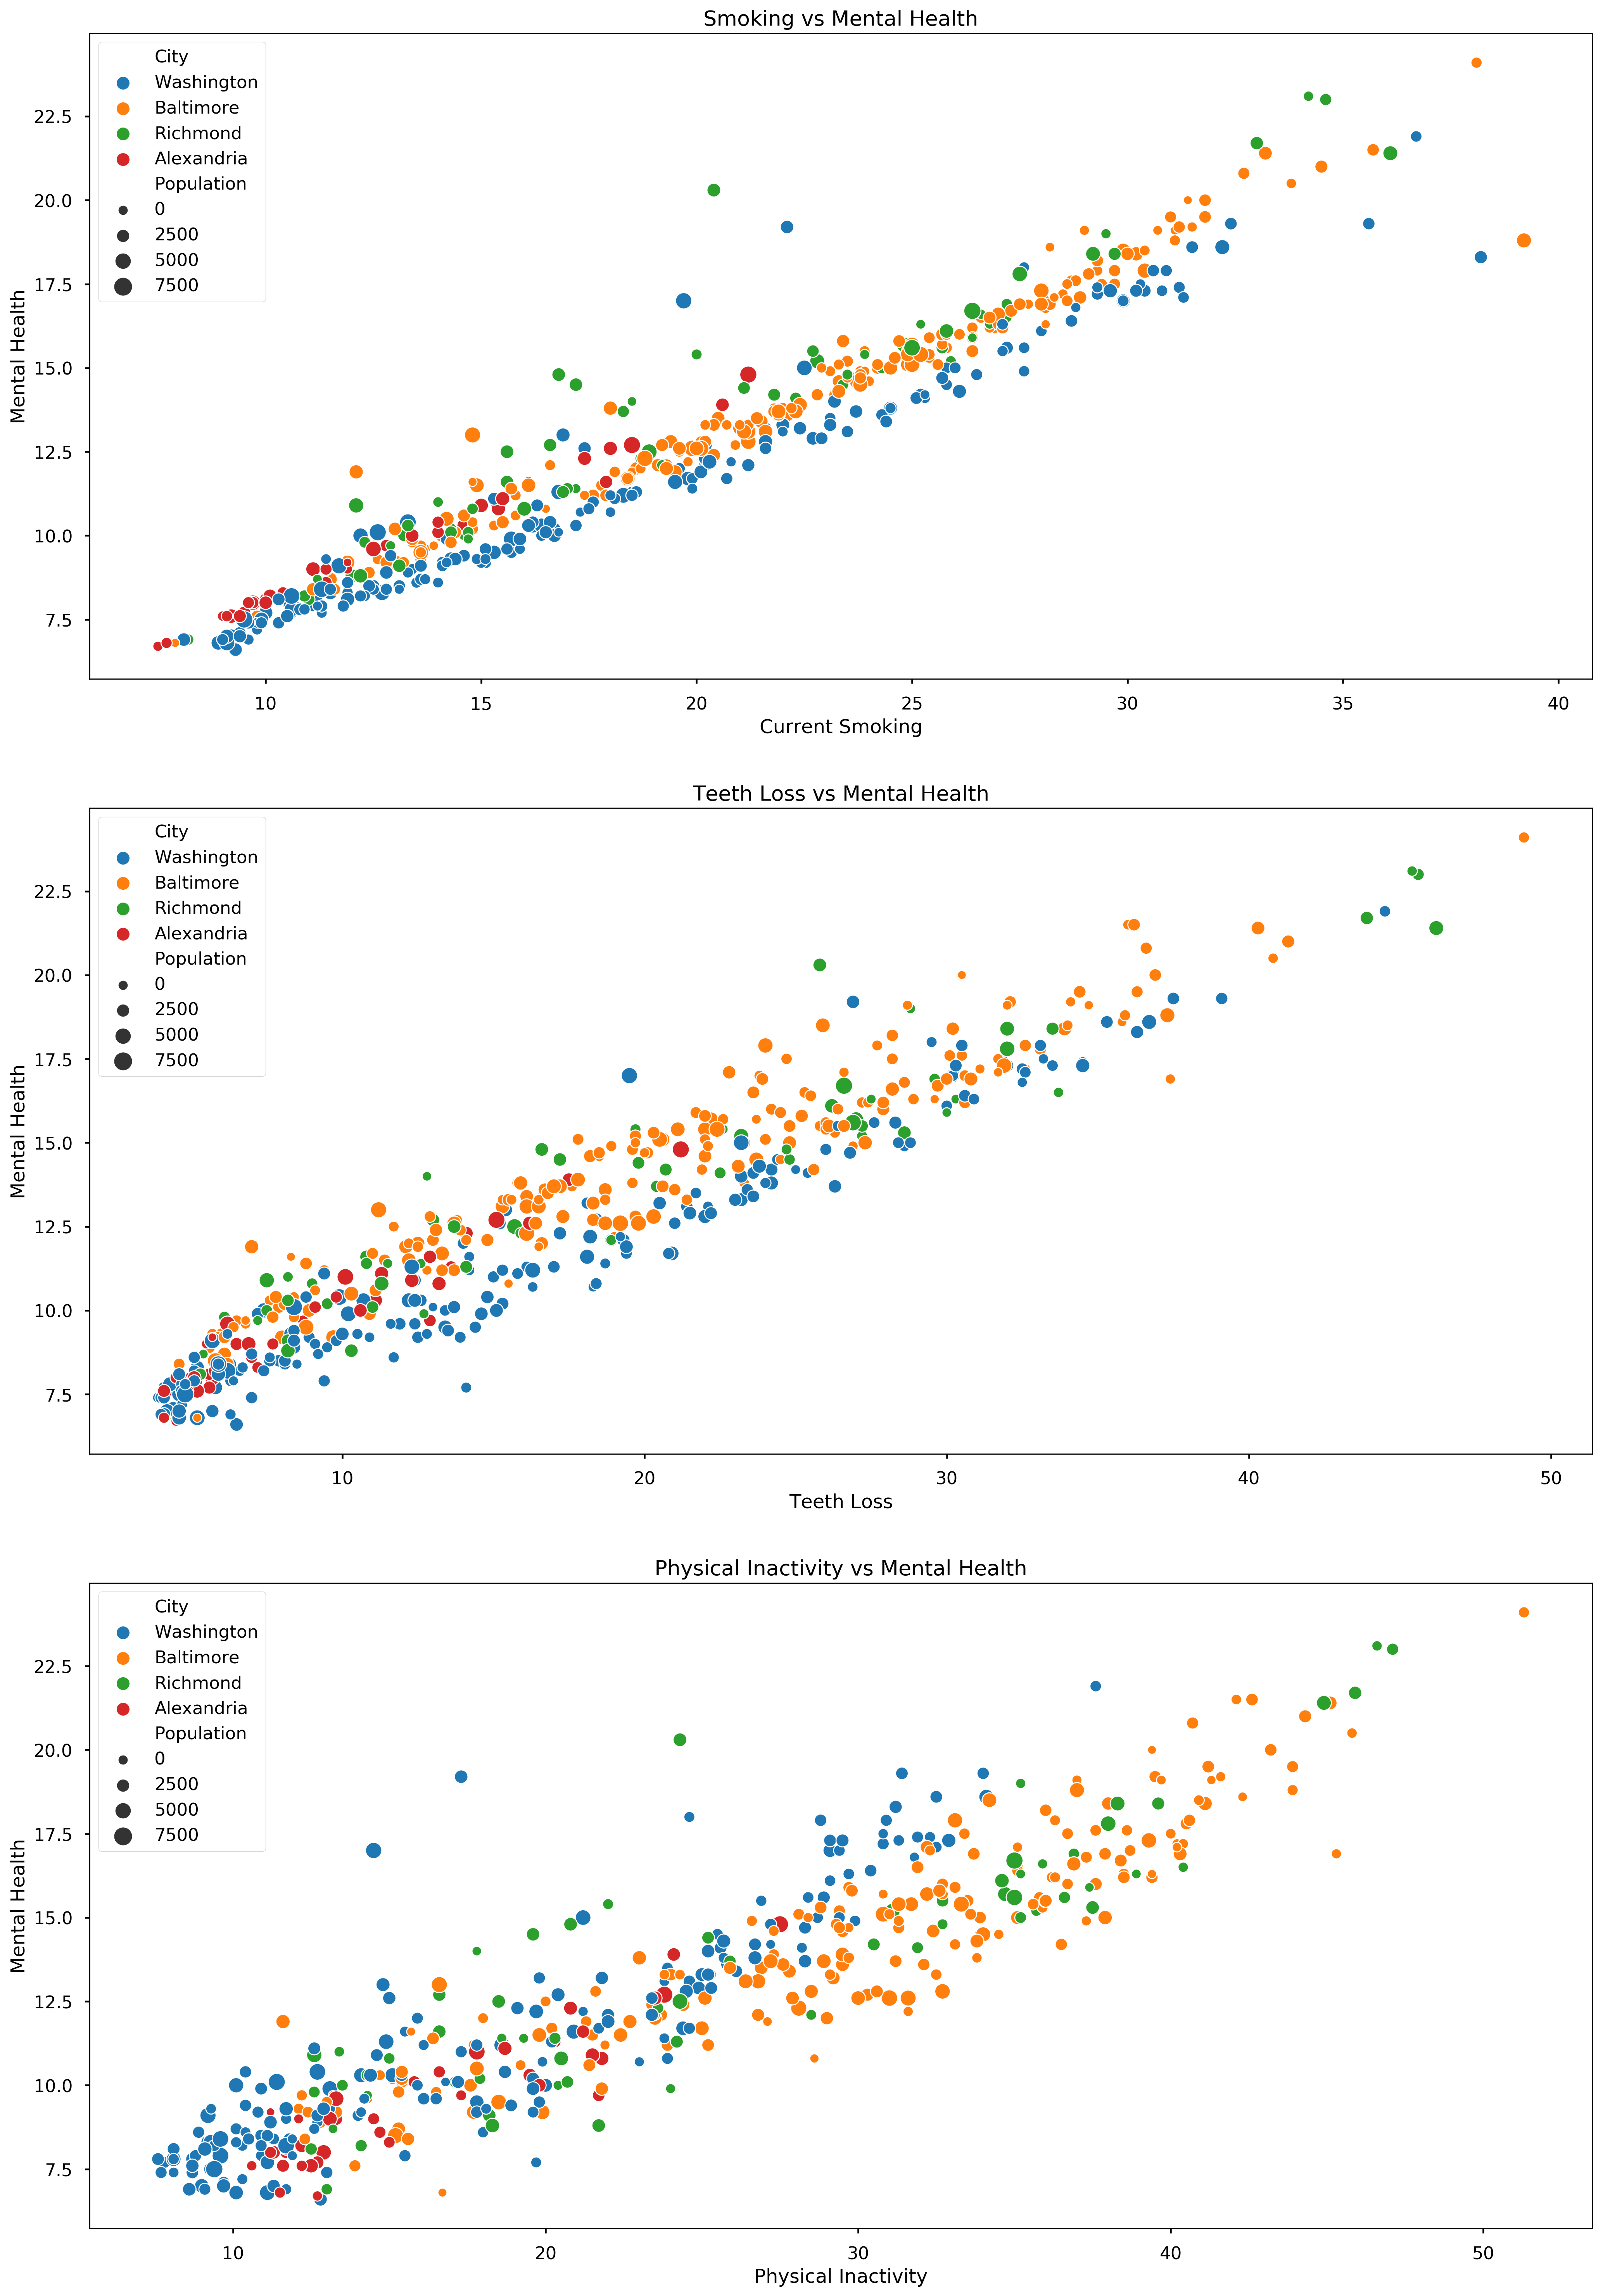

In [8]:
# Now that we know what questions have the highest correlation to poor mental health, we can visualize their relationship

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-talk')

plt.figure(figsize=(20,30), dpi=250)

plt.subplot(3,1,1)
sns.scatterplot(x='Current Smoking',y='Mental Health', hue='City', size='Population', data=dmv_df)
plt.title('Smoking vs Mental Health')

plt.subplot(3,1,2)
g = sns.scatterplot(x='Teeth Loss',y='Mental Health', hue='City', size='Population', data=dmv_df)
plt.title('Teeth Loss vs Mental Health')

plt.subplot(3,1,3)
sns.scatterplot(x='Physical Inactivity',y='Mental Health', hue='City', size='Population', data=dmv_df)
plt.title('Physical Inactivity vs Mental Health')
plt.show()

In [9]:
# Export the data to a csv so we can use it in tableau
dmv_df.to_csv('../Data/TractGIS.csv', index=False)

Because jupyter notebooks/ipython is browser based, we can embed a tableau dashboard created using our exported data

In [10]:
%%HTML
<div class='tableauPlaceholder' id='viz1558521734827' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;50&#47;500Map&#47;Dashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='500Map&#47;Dashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;50&#47;500Map&#47;Dashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1558521734827');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Looking at this map, we can see that the income of an area is related to the prevalence of various health conditions. For example, in DC we can see that lower income neighborhoods in the SE and NE quadrants of the city have worse mental health. And, if we use the filters on the map, we can see that those neighborhoods also smoke more, have more teeth loss, and more physical inactivity. Previous [studies](https://www.ncbi.nlm.nih.gov/pubmed/21464366) confirm this finding as it has been shown that people living in low income households are more likely to suffer from mental disorders. 

In recent years, mental health care reform has become a widely discussed issue among both politicians and the general public. It has been suggested that improved access to care will signficantly reduce the percentage of Americans with mental illnesses. While these data does show that there is a relationship between something like a lack of health insurance (r = 0.87) and poor mental health, it also shows that per capita income is a strong predictor of a community's mental health. Income also appears to be a strong predictor of smoking, teeth loss, and physical inactivity prevalence. This suggests that while access to care is imperative, tackling the issue of widespread wealth inqeuality may be the best way to combat mental illness.